In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings 
warnings.filterwarnings('ignore')

In [17]:
pip install kaggle_secrets


ERROR: Could not find a version that satisfies the requirement kaggle_secrets (from versions: none)
ERROR: No matching distribution found for kaggle_secrets
Note: you may need to restart the kernel to use updated packages.


Notebook Color Scheme:


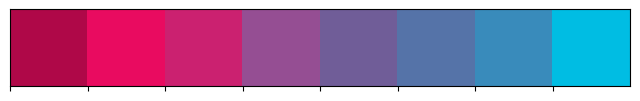

In [10]:
# Libraries
import os
import gc
import wandb
import time
import random
import math
import glob
from scipy import spatial
from tqdm import tqdm
import warnings
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from IPython.display import display_html
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Update matplotlib parameters
plt.rcParams.update({'font.size': 16})

# Environment setup
warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'competition': 'HandM', '_wandb_kernel': 'aot'}



Notebook Color Scheme:


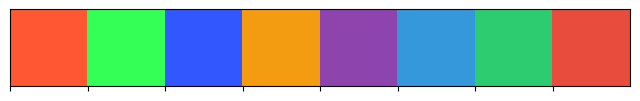

FileNotFoundError: [Errno 2] No such file or directory: '/Users/girimanoharv/Documents/input/hm-fashion-recommender-dataset/background.jpg'

In [11]:
# Custom colors
class Color:
    START = '\033[1m' + '\033[95m'
    END = '\033[0m'

# Define new custom color palette
my_colors = [
    "#FF5733", "#33FF57", "#3357FF", 
    "#F39C12", "#8E44AD", "#3498DB", 
    "#2ECC71", "#E74C3C"
]

# Display notebook color scheme
print(Color.START + "Notebook Color Scheme:" + Color.END)
sns.palplot(sns.color_palette(my_colors))
plt.show()



In [12]:
pd.set_option('display.max_columns', 50)

In [14]:
# 🐝 Secrets
from kaggle_secrets import UserSecretsClient

# Initialize the UserSecretsClient
user_secrets = UserSecretsClient()

# Retrieve the secret value for "wandb"
secret_value_0 = user_secrets.get_secret("wandb")

# Login to wandb using the retrieved secret value
!wandb login $secret_value_0


ModuleNotFoundError: No module named 'kaggle_secrets'

In [ ]:
'''
# Upload kaggle.json
files.upload()
# Create .kaggle directory and move kaggle.json
mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json


# Download the dataset
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations
!unzip h-and-m-personalized-fashion-recommendations.zip -d ./hm_dataset
'''

SyntaxError: invalid syntax (961315739.py, line 4)

In [13]:
%%time
transactions = pd.read_csv('/Volumes/Giri SSD T7/Code/H&M/transactions_train.csv'), 
articles = pd.read_csv('/Volumes/Giri SSD T7/Code/H&M/articles.csv')
customers = pd.read_csv('/Volumes/Giri SSD T7/Code/H&M/customers.csv')


CPU times: user 30.3 s, sys: 4.25 s, total: 34.5 s
Wall time: 37.4 s


In [19]:
ss = pd.read_csv('/Volumes/Giri SSD T7/Code/H&M/sample_submission.csv')


In [26]:
transactions

(               t_dat                                        customer_id  \
 0         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
 1         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
 2         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
 3         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
 4         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
 ...              ...                                                ...   
 31788319  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
 31788320  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
 31788321  2020-09-22  fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...   
 31788322  2020-09-22  fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...   
 31788323  2020-09-22  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   
 
           article_id     price  sales_channel_id  
 0          663713001  0.050831   

In [27]:
transactions = transactions[0]

In [29]:
# Custom colors for print statements
class Color:
    GOLD = '\033[33m'
    RESET = '\033[0m'

def display_df_info(df, name):
    if isinstance(df, pd.DataFrame):
        print(f"{Color.GOLD}{name}:{Color.RESET} {df.shape}")
        null_values = df.isnull().sum().sum()
        print(f"{Color.GOLD}Null values in {name}:{Color.RESET} {null_values}")
        display_html(df.head())
    else:
        print(f"{Color.GOLD}{name}:{Color.RESET} is not a DataFrame, it is of type {type(df)}")

# Display shape, null values, and head of DataFrames
display_df_info(articles, "ARTICLES")
display_df_info(customers, "CUSTOMERS")
display_df_info(transactions, "TRANSACTIONS")
display_df_info(ss, "SAMPLE_SUBMISSION")

ARTICLES: (105542, 25)
Null values in ARTICLES: 416


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


CUSTOMERS: (1371980, 7)
Null values in CUSTOMERS: 1840560


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


TRANSACTIONS: (31788324, 5)
Null values in TRANSACTIONS: 0


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


SAMPLE_SUBMISSION: (1371980, 2)
Null values in SAMPLE_SUBMISSION: 0


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [ ]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'no of unique {col}: {un_n}')


no of unique prod_name: 45875
no of unique product_type_name: 131
no of unique product_group_name: 19
no of unique graphical_appearance_name: 30
no of unique colour_group_name: 50
no of unique perceived_colour_value_name: 8
no of unique perceived_colour_master_name: 20
no of unique department_name: 250
no of unique index_name: 10
no of unique index_group_name: 5
no of unique section_name: 56
no of unique garment_group_name: 21
no of unique detail_desc: 43404


In [30]:
# Handle null values
articles_cleaned = articles.copy()

# Drop rows with any null values
articles_dropped = articles_cleaned.dropna()
print(f"After dropping rows with null values: {articles_dropped.shape}")

# Fill null values with 'Unknown' for categorical columns and mean for numerical columns
for column in articles_cleaned.columns:
    if articles_cleaned[column].dtype == 'object':
        articles_cleaned[column].fillna('Unknown', inplace=True)
    else:
        articles_cleaned[column].fillna(articles_cleaned[column].mean(), inplace=True)

print(f"Null values after cleaning: {articles_cleaned.isnull().sum().sum()}")

# Display cleaned DataFrame
display_html(articles_cleaned.head())

After dropping rows with null values: (105126, 25)
Null values after cleaning: 0


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [31]:
categorical_columns = articles_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    articles_cleaned = articles_cleaned[articles_cleaned[column] != 'Unknown']

print(f"After dropping rows with 'Unknown': {articles_cleaned.shape}")


After dropping rows with 'Unknown': (100504, 25)


In [32]:

import glob
# Find all image paths in the specified directory
all_image_paths = glob.glob("/Users/girimanoharv/Documents/h&m images//*/*")

num_unique_article_ids = len(articles['article_id'].unique())
num_unique_images = len(all_image_paths)

# Print results
print(f"Number of unique article_ids within articles.csv: {num_unique_article_ids}")
print(f"Number of unique images within the image folder: {num_unique_images}")


Number of unique article_ids within articles.csv: 105542
Number of unique images within the image folder: 105100
=> not all article_ids have a corresponding image!!!


In [35]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot

output_notebook()

# Data preparation
prod_name_counts = articles["prod_name"].value_counts().reset_index().head(15)
total_prod_names = articles["prod_name"].nunique()
source = ColumnDataSource(prod_name_counts)

# Create a color map
colors = ["#CB2170" if x == max(prod_name_counts["prod_name"]) else '#954E93' for x in prod_name_counts["prod_name"]]

# Bokeh figure
p = figure(x_range=prod_name_counts["index"], plot_height=400, plot_width=800, title="- Most Frequent Product Names -",
           toolbar_location=None, tools="")

p.vbar(x='index', top='prod_name', width=0.9, source=source, line_color='white', fill_color=factor_cmap('index', palette=colors, factors=prod_name_counts["index"]))

# Customize plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Product Name"
p.xaxis.major_label_orientation = 1.2

hover = HoverTool()
hover.tooltips = [("Product Name", "@index"), ("Count", "@prod_name")]
p.add_tools(hover)

show(p)


Loading BokehJS ...

KeyError: 'index'

In [37]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot

output_notebook()

# Data preparation
prod_name_counts = articles["prod_name"].value_counts().reset_index().head(15)
prod_name_counts.columns = ['prod_name', 'count']
total_prod_names = articles["prod_name"].nunique()
source = ColumnDataSource(prod_name_counts)

# Create a color map
colors = ["#CB2170" if x == max(prod_name_counts["count"]) else '#954E93' for x in prod_name_counts["count"]]

# Bokeh figure
p = figure(x_range=prod_name_counts["prod_name"].tolist(), height=400, width=800, title="- Most Frequent Product Names -",
           toolbar_location=None, tools="")

p.vbar(x='prod_name', top='count', width=0.9, source=source, line_color='white', fill_color=factor_cmap('prod_name', palette=colors, factors=prod_name_counts["prod_name"].tolist()))

# Customize plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Count"
p.xaxis.major_label_orientation = 1.2

hover = HoverTool()
hover.tooltips = [("Product Name", "@prod_name"), ("Count", "@count")]
p.add_tools(hover)

show(p)


Loading BokehJS ...